# Introduction
-----------------------
 **`The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant. Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day.
 Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data.​`**
--------------------


--------------------------------------


In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [745]:
df = pd.read_csv('zomato.csv',sep=',',encoding="utf-8")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Columns description**

**`url`**

    contains the url of the restaurant in the zomato website
    
_____________________
**`address`**

    contains the address of the restaurant in Bengaluru

_____________________
**`name`**

    contains the name of the restaurant

_____________________
**`online_order`**

    whether online ordering is available in the restaurant or not

_____________________
**`book_table`**

    table book option available or not

_____________________
**`rate`**

    contains the overall rating of the restaurant out of 5

_____________________
**`votes`**

    contains total number of rating for the restaurant as of the above mentioned date

_____________________
**`phone`**

    contains the phone number of the restaurant

_____________________
**`location`**

    contains the neighborhood in which the restaurant is located

_____________________
**`rest_type`**

    restaurant type

_____________________
**`dish_liked`**
dishes people liked in the restaurant

_____________________
**`cuisines`**

    food styles, separated by comma

_____________________
**`approx_cost(for two people)`**

    contains the approximate cost for meal for two people

_____________________
**`reviews_list`**

    list of tuples containing reviews for the restaurant, each tuple 

_____________________
**`menu_item`**

    contains list of menus available in the restaurant

_____________________
**`listed_in(type)`**
    
    type of meal

_____________________
**`listed_in(city)`**
    
    contains the neighborhood in which the restaurant is listed


In [747]:
df.shape

(51717, 17)

In [748]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [749]:
del df['url']
del df['address']
del df['phone']
df.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [750]:
df.apply(lambda x:len(x.unique()))
## Apllying a lambda function on the dataset to return the lenght of every unique column.

name                8792
online_order           2
book_table             2
rate                  65
votes               2328
location              94
rest_type             94
dish_liked          5272
cuisines            2724
average_cost          71
reviews_list       22513
menu_item           9098
restaurant_type        7
locality              30
dtype: int64

In [751]:
print('online_order ',df['online_order'].unique())
print('book_table  ',df['book_table'].unique())
print('restaurant_type',df['restaurant_type'].unique())

online_order  ['Yes' 'No']
book_table   ['Yes' 'No']
restaurant_type ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']


In [752]:
sns.set_theme(style="darkgrid")


In [753]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'restaurant_type', 'locality'],
      dtype='object')

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51717 non-null  object
 1   online_order     51717 non-null  object
 2   book_table       51717 non-null  object
 3   rate             43942 non-null  object
 4   votes            51717 non-null  int64 
 5   location         51696 non-null  object
 6   rest_type        51490 non-null  object
 7   dish_liked       23639 non-null  object
 8   cuisines         51672 non-null  object
 9   average_cost     51371 non-null  object
 10  reviews_list     51717 non-null  object
 11  menu_item        51717 non-null  object
 12  restaurant_type  51717 non-null  object
 13  locality         51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


## Dropping missing values in rate column

In [755]:
df.fillna(method="pad", inplace=True)


In [756]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
average_cost       0
reviews_list       0
menu_item          0
restaurant_type    0
locality           0
dtype: int64

In [757]:
#splitting data in rate column using vectorized operation

df['rating']=df['rate'].str[0:3]


In [758]:
df['rating'].dtype

dtype('O')

In [759]:
df.rating[72]

'NEW'

In [760]:
df.rate[72]

'NEW'

In [761]:
df['rating']=df['rating'].replace(['NEW'],1.0)


In [762]:
df.rating

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.6
51714    3.6
51715    4.3
51716    3.4
Name: rating, Length: 51717, dtype: object

In [763]:
print('rating ',df['rating'].unique())


rating  ['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 1.0 '2.9' '3.5' '2.6' '3.4' '4.5' '2.5' '2.7' '4.7'
 '2.4' '2.2' '2.3' '-' '4.8' '4.9' '2.1' '2.0' '1.8']


In [764]:
df['rating']=df['rating'].replace(['-'],0.0)


In [765]:
#changing object datatype of rating column to numerical data
df['rating'] =pd.to_numeric(df['rating'])
df.dtypes

name                object
online_order        object
book_table          object
rate                object
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
average_cost        object
reviews_list        object
menu_item           object
restaurant_type     object
locality            object
rating             float64
dtype: object

In [766]:
#creating target column depending in rating column values
df['target'] = np.where(df['rating']>=3.75, '1', '0')

In [767]:
df = df.drop ('rate',axis=1)

In [768]:
df.dtypes

name                object
online_order        object
book_table          object
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
average_cost        object
reviews_list        object
menu_item           object
restaurant_type     object
locality            object
rating             float64
target              object
dtype: object

In [769]:
df['target'] =pd.to_numeric(df['target'])


In [770]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality,rating,target
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,1
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,1


## **`1- what’s most common in Bangalore Restaurants? Do they offer online ordering and table booking?`**

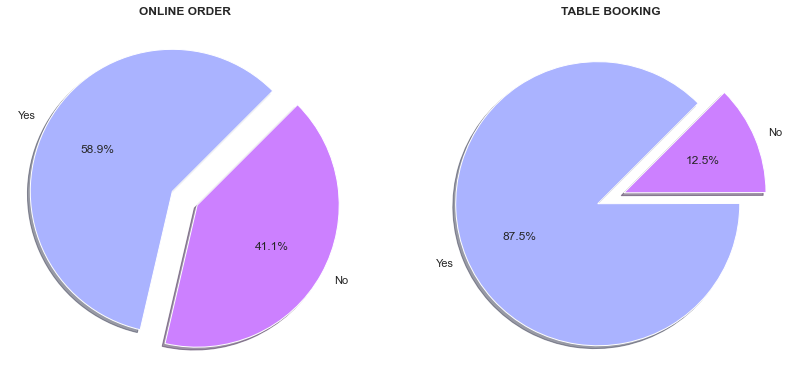

In [771]:
fig, ax = plt.subplots(1,2, figsize = (14,14))
(ax1, ax2) = ax

labels = ["Yes", "No"]
values = df['online_order'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("ONLINE ORDER", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Yes", "No"]
values = df['book_table'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True,startangle=45,explode=[0.1, 0.1])
ax2.set_title("TABLE BOOKING", fontdict={'fontsize': 12},fontweight ='bold')

plt.savefig("LR.png")

## **`2- what are the types of services in Bangalore Restaurants ? `**

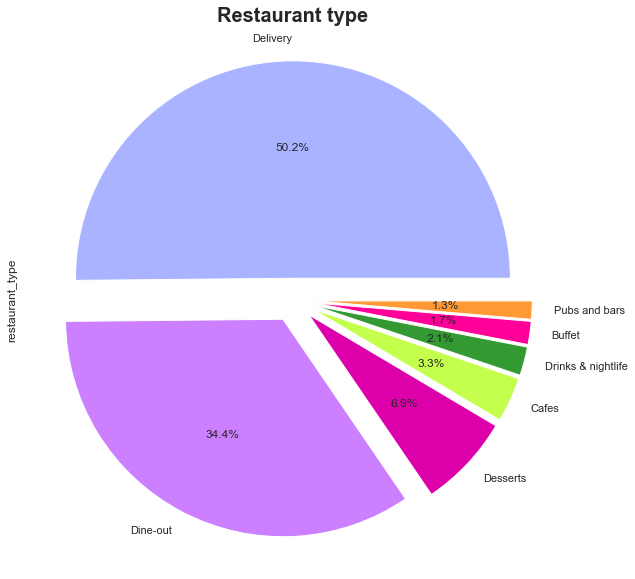

In [772]:
plt.figure(figsize=(15,10))
round(df["restaurant_type"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colors=['#AAb3ff','#CC80FF','#DD00AA','#c4ff4d','#339933','#FF0099','#FF9933'],explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1))
plt.title('Restaurant type',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("Restaurant type.png")

## 3- where are the Bangalore Restaurants located? 

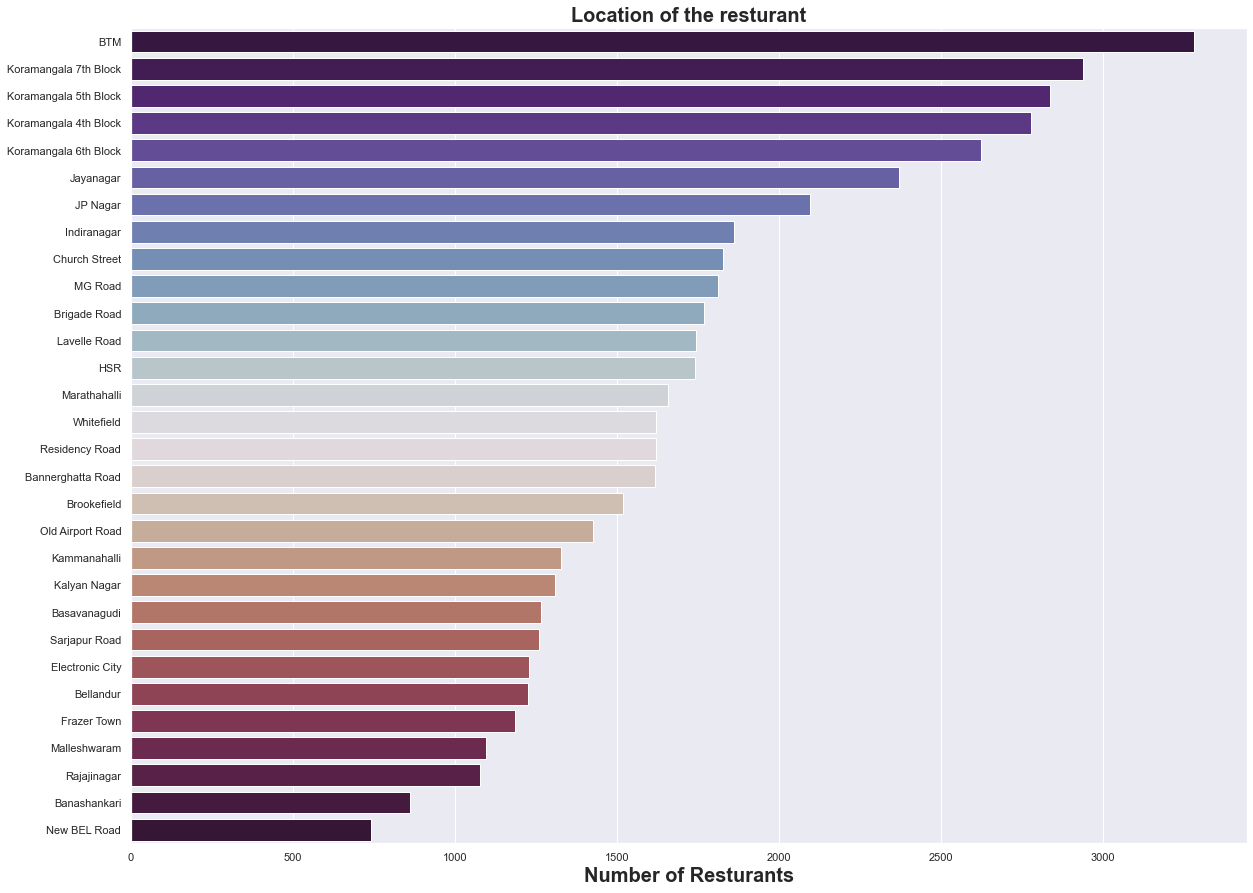

In [773]:
plt.figure(figsize=(20,15))
chains=df['locality'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title("Location of the resturant",fontdict={'fontsize': 20},fontweight ='bold')
plt.xlabel("Number of Resturants",fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("Location of the resturant.png")

## 4- What are the most famous resturants in Bangalore?

In [841]:
plt.figure(figsize=(20,15))
chains=df['name'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title("Most famous restaurants in Bangaluru",fontdict={'fontsize': 20},fontweight ='bold')
plt.xlabel("Number of outlets",fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("Most famous restaurants chains in Bangaluru.png")

KeyError: 'name'

<Figure size 1440x1080 with 0 Axes>

## 5- How does the resturant type affect it's performance?

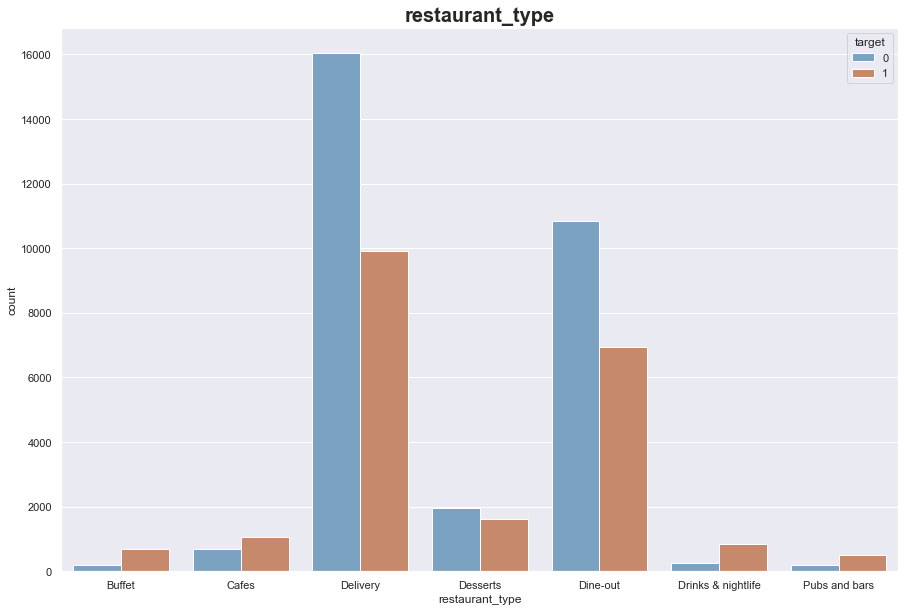

In [775]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['restaurant_type'],data=df,hue='target',palette="twilight_shifted",saturation=2,dodge=True)
plt.title('restaurant_type',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("restaurant_type&target.png")

In [776]:
df.columns

Index(['name', 'online_order', 'book_table', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'average_cost', 'reviews_list', 'menu_item',
       'restaurant_type', 'locality', 'rating', 'target'],
      dtype='object')

## 6- How does the availability of online booking affect restaurant Performance?

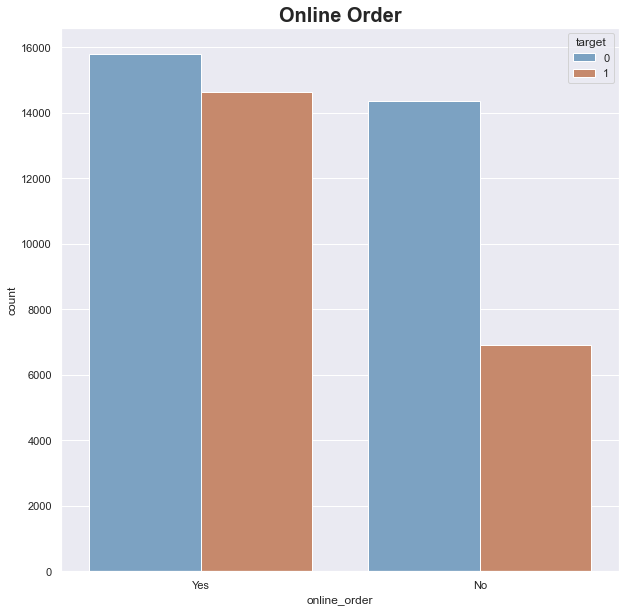

In [777]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['online_order'],hue='target',data=df,palette="twilight_shifted",saturation=2,dodge=True)
plt.title('Online Order',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("order&target.png")

## 7- How does the availability of Table booking affect restaurant Performance?

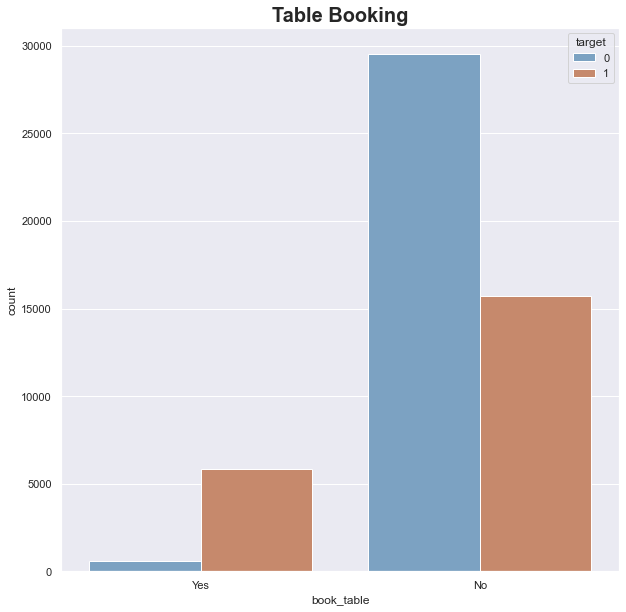

In [778]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['book_table'],hue='target',data=df,palette="twilight_shifted",saturation=2,dodge=True)
plt.title('Table Booking',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("booking&target.png")

## 8- How does the Type of meals affect restaurant Performance?

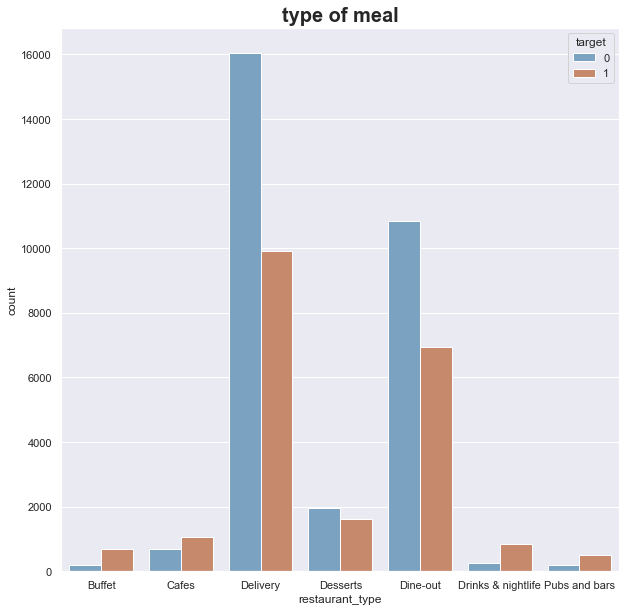

In [779]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['restaurant_type'],hue='target',data=df,palette="twilight_shifted",saturation=2,dodge=True)
plt.title('type of meal',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("type&target.png")

## 9- What're the most common resurant types in Bangalore?

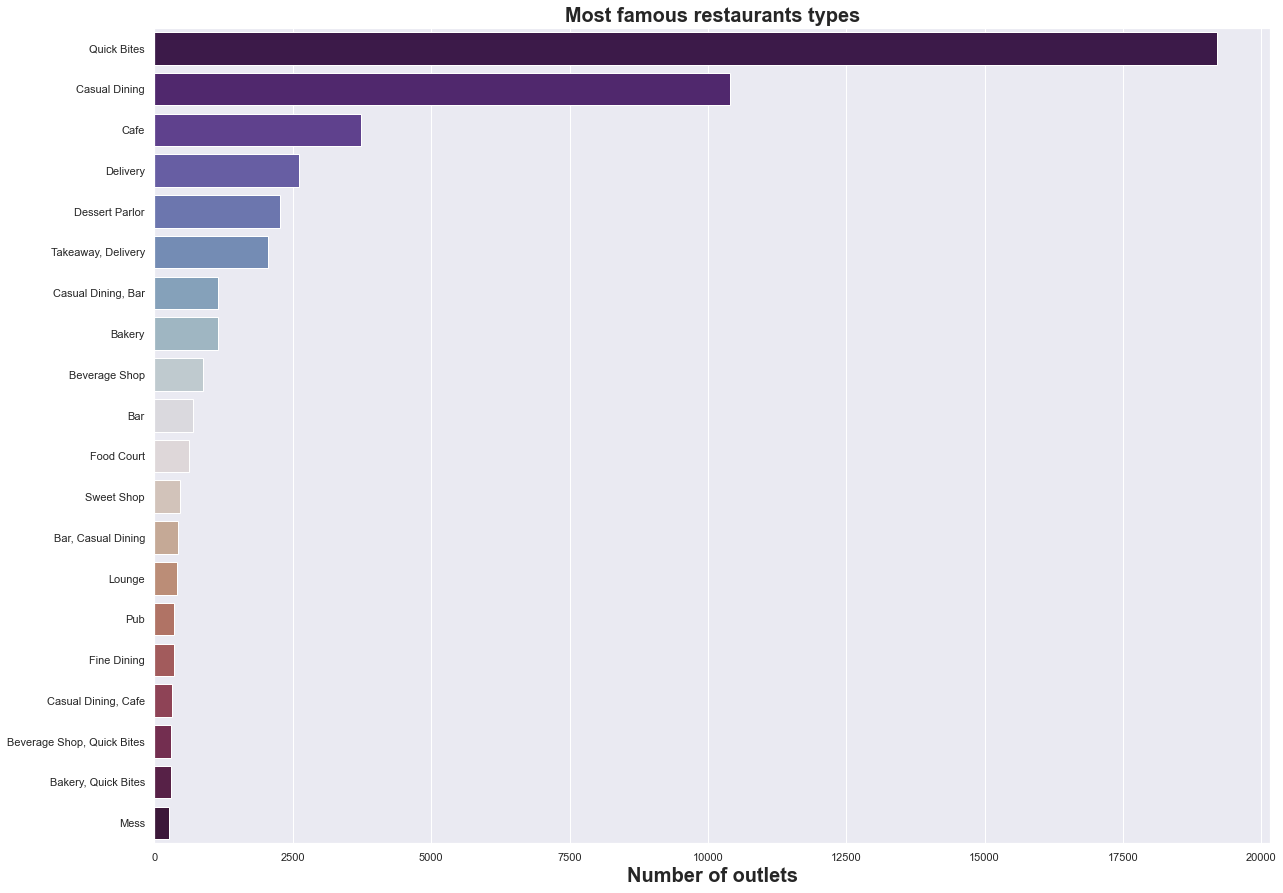

In [780]:
plt.figure(figsize=(20,15))
chains=df['rest_type'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title("Most famous restaurants types",fontdict={'fontsize': 20},fontweight ='bold')
plt.xlabel("Number of outlets",fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("famous_type.png")

## 10- What're the most common Average cost for meal for two people in Bangalore?

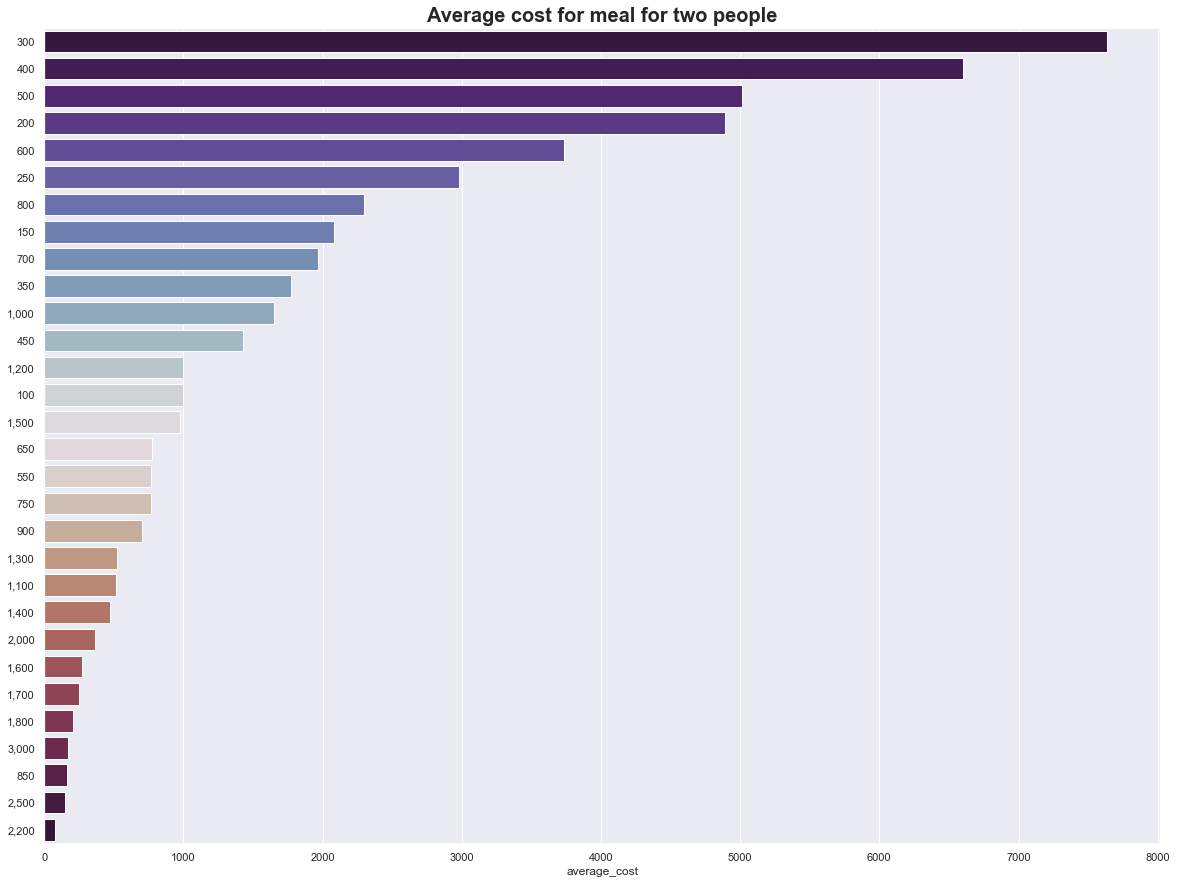

In [781]:
plt.figure(figsize=(20,15))
chains=df['average_cost'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title('Average cost for meal for two people',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("common_coast.png")

## 11- What're the most common food styles in Bangalore?

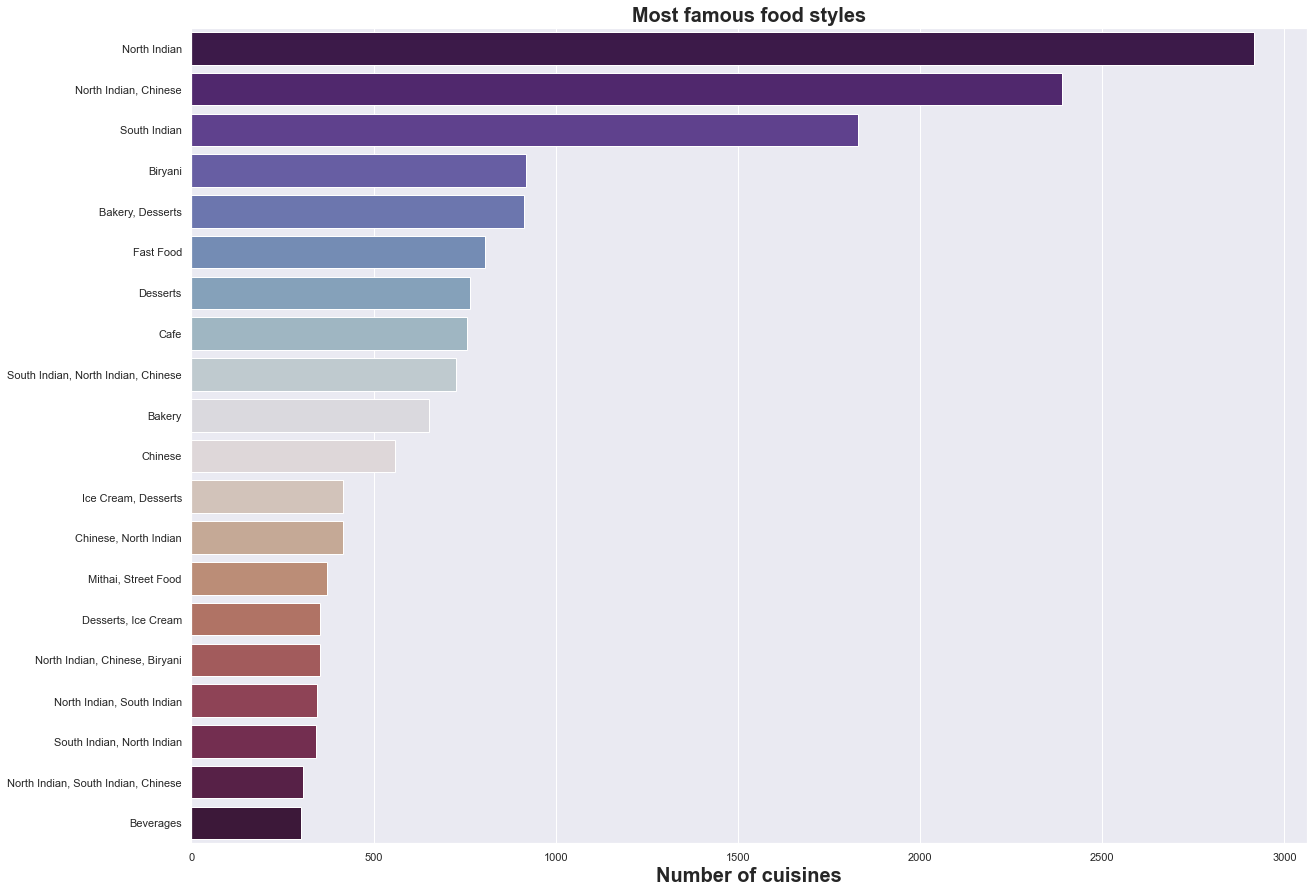

In [782]:
plt.figure(figsize=(20,15))
chains=df['cuisines'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title("Most famous food styles",fontdict={'fontsize': 20},fontweight ='bold')
plt.xlabel("Number of cuisines",fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("common_cuisines.png")

## 12 - What're the most dish liked in Bangalore ?

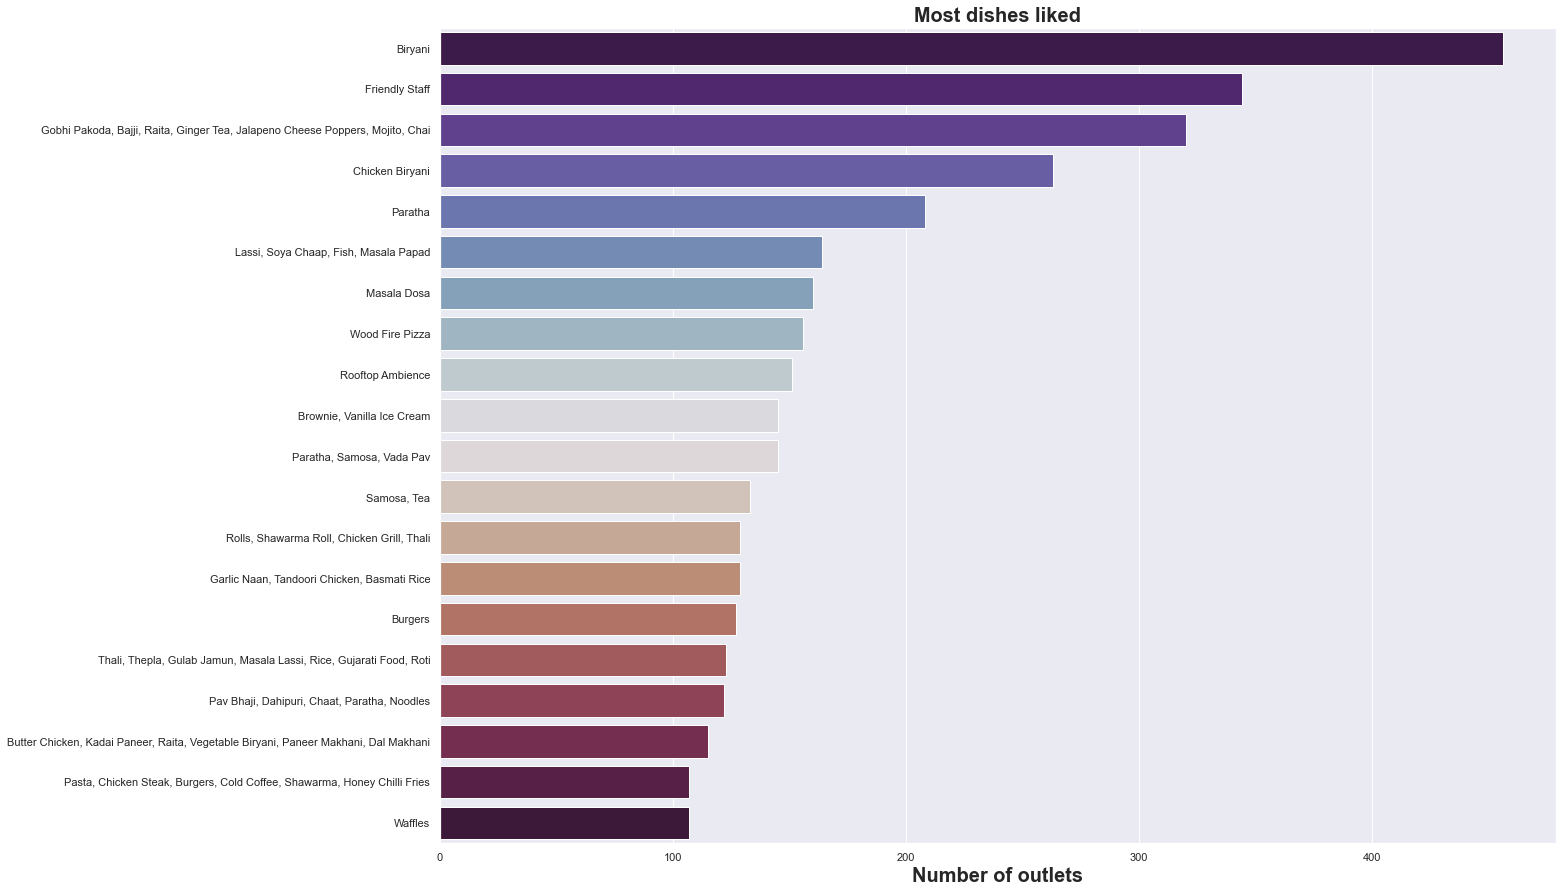

In [783]:
plt.figure(figsize=(20,15))
chains=df['dish_liked'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="twilight_shifted")
plt.title("Most dishes liked",fontdict={'fontsize': 20},fontweight ='bold')
plt.xlabel("Number of outlets",fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("common_dishes.png")

## 13- How does the Type of the restaurant affect Online ordering?

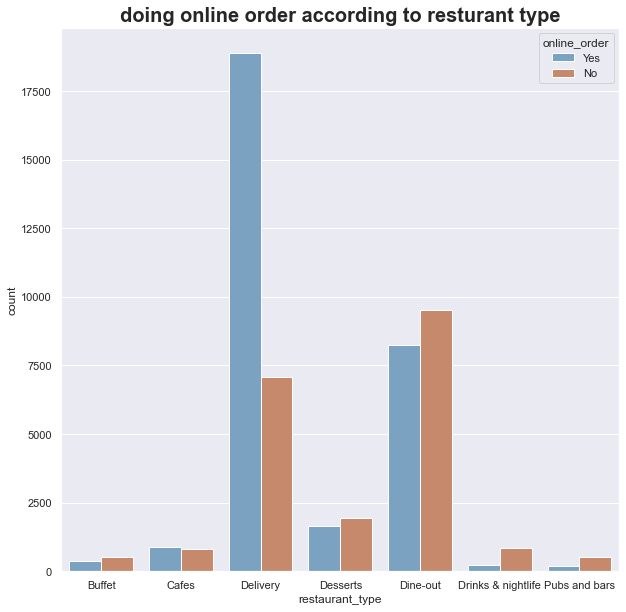

In [784]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['restaurant_type'],hue='online_order',data=df,palette="twilight_shifted",saturation=2,dodge=True)
plt.title('doing online order according to resturant type',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("type&order.png")

## 14- How does the Type of the restaurant affect Table booking availibility?

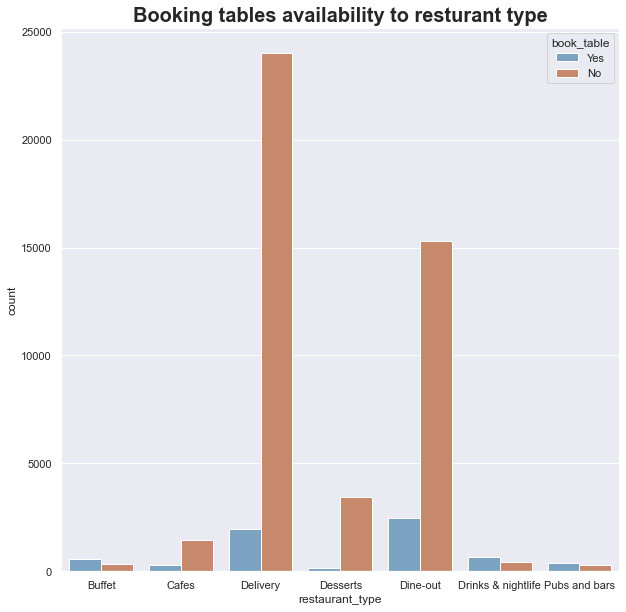

In [785]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['restaurant_type'],hue='book_table',data=df,palette="twilight_shifted",saturation=2,dodge=True)
plt.title('Booking tables availability to resturant type',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("type&booking.png")

## 15- How does the Type of the restaurant Location affect Online Ordering?

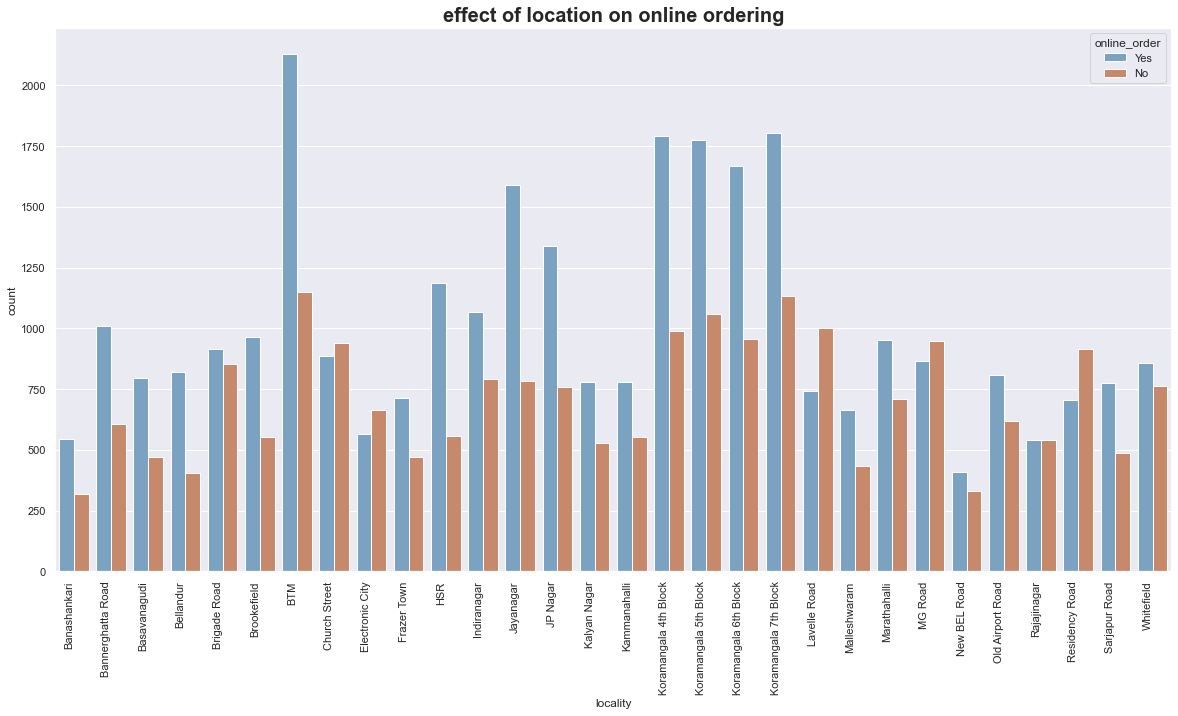

In [786]:
plt.figure(figsize=(20,10))
g=sns.countplot(x=df['locality'],hue='online_order',data=df,palette="twilight_shifted",saturation=2,dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('effect of location on online ordering',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("location&order.png")

## 16- How does the Type of the restaurant Location affect Booking table availability?

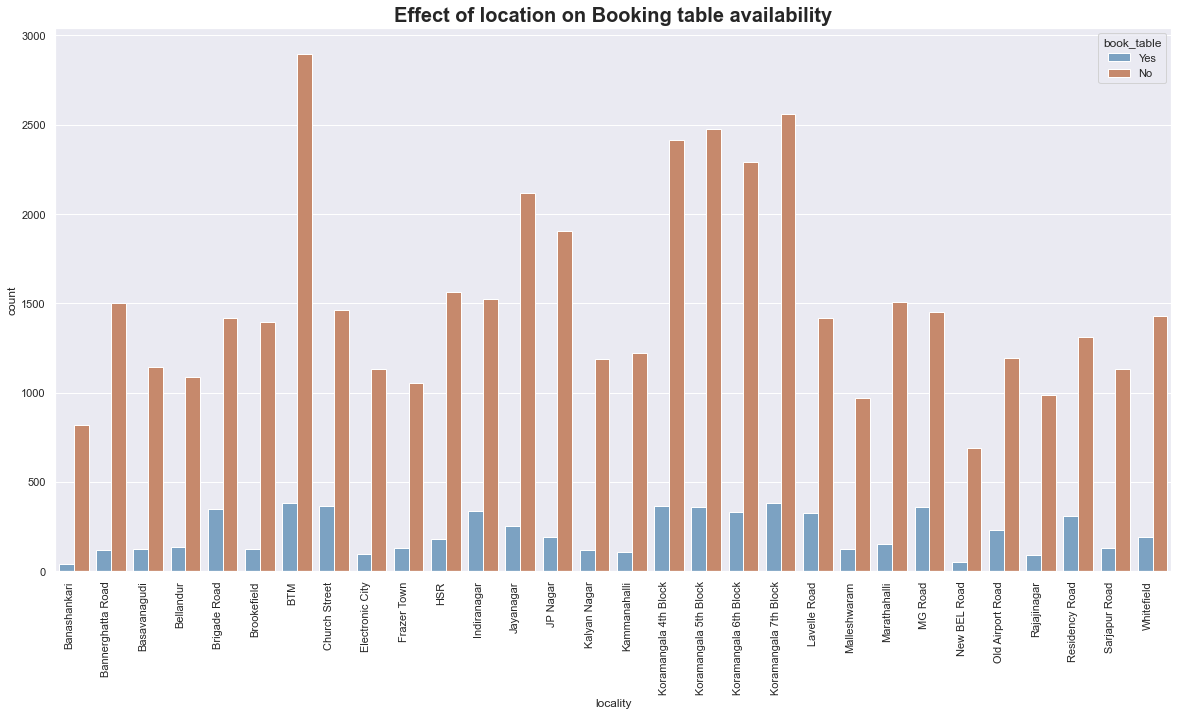

In [787]:
plt.figure(figsize=(20,10))
g=sns.countplot(x=df['locality'],hue='book_table',data=df,palette="twilight_shifted",saturation=2,dodge=True)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Effect of location on Booking table availability',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("Location&booking.png")

In [788]:
df.dtypes

name                object
online_order        object
book_table          object
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
average_cost        object
reviews_list        object
menu_item           object
restaurant_type     object
locality            object
rating             float64
target               int64
dtype: object

## Encoding Data

In [789]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in Dataframe. 
les = {}
for col in ['online_order','location','book_table','votes', 'rest_type','dish_liked','cuisines','average_cost','reviews_list','menu_item','restaurant_type','locality','rating']:
    les[col] = label_encoder
    df[col]  = les[col].fit_transform(df[col])
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality,rating,target
0,Jalsa,1,1,767,1,27,3651,2159,66,10851,9097,0,1,24,1
1,Spice Elephant,1,0,778,1,27,2964,952,66,12530,9097,0,1,24,1
2,San Churro Cafe,1,0,887,1,22,1416,766,66,4652,9097,0,1,21,1
3,Addhuri Udupi Bhojana,0,0,87,1,78,2766,2555,42,9293,9097,0,1,20,0
4,Grand Village,0,0,165,4,27,3453,2188,60,15505,9097,0,1,21,1


## Data normalization

In [790]:
def normalize_col(col_name):
    return (df[col_name] - df[col_name].min())/(df[col_name].max()-df[col_name].min())

for coll in ['online_order','location','book_table','votes', 'rest_type','dish_liked','cuisines','average_cost','reviews_list','menu_item','restaurant_type','locality','rating']:
    df[coll]=normalize_col(coll)
df.head()


,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality,rating,target
0,Jalsa,1.0,1.0,0.329609,0.010870,0.293478,0.692789,0.793167,0.956522,0.482010,1.0,0.0,0.034483,0.75000,1
1,Spice Elephant,1.0,0.0,0.334336,0.010870,0.293478,0.562429,0.349743,0.956522,0.556592,1.0,0.0,0.034483,0.75000,1
2,San Churro Cafe,1.0,0.0,0.381177,0.010870,0.239130,0.268691,0.281411,0.956522,0.206645,1.0,0.0,0.034483,0.65625,1
3,Addhuri Udupi Bhojana,0.0,0.0,0.037387,0.010870,0.847826,0.524858,0.938648,0.608696,0.412802,1.0,0.0,0.034483,0.62500,0
4,Grand Village,0.0,0.0,0.070907,0.043478,0.293478,0.655218,0.803821,0.869565,0.688744,1.0,0.0,0.034483,0.65625,1


In [791]:
df.drop(['name'], axis=1,inplace=True)

## linear correlation

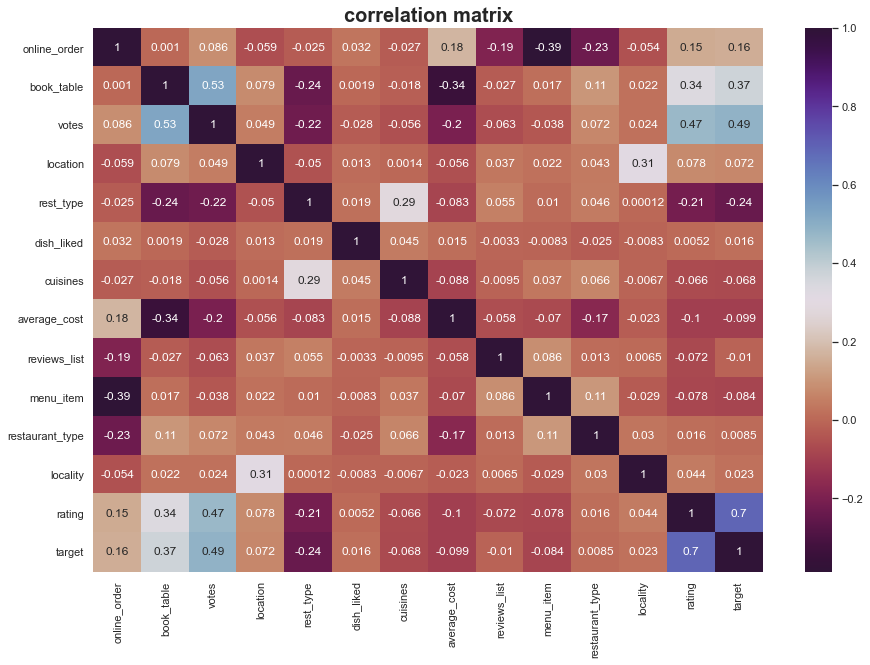

In [792]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar = True, annot =True,cmap='twilight_shifted_r')
plt.title('correlation matrix',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("corr_matrix.png")

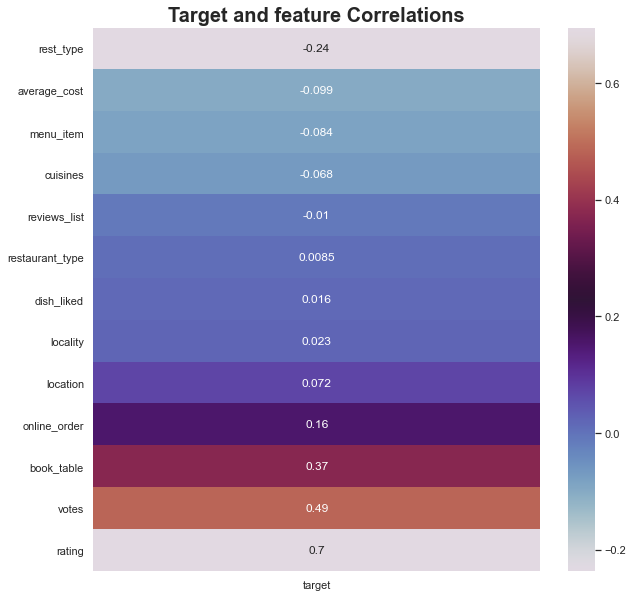

In [793]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='twilight')
plt.title('Target and feature Correlations',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("feature_corr.png")

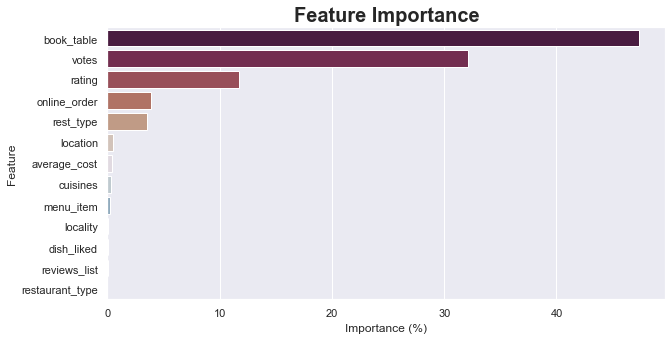

In [794]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(10,5))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.title('Feature Importance',fontdict={'fontsize': 20},fontweight ='bold')
plt.savefig("feature_importance.png")

In [795]:
df.describe()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality,rating,target
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,0.093726,0.391871,0.556858,0.490973,0.515083,0.606301,0.569065,0.882574,0.467896,0.489739,0.579252,0.416768
std,0.492080,0.330379,0.181334,0.295481,0.299919,0.290757,0.283814,0.264240,0.322545,0.254030,0.190140,0.285736,0.190805,0.493029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.002578,0.130435,0.293478,0.234156,0.255694,0.478261,0.280917,1.000000,0.333333,0.241379,0.500000,0.000000
50%,1.000000,0.000000,0.017190,0.347826,0.467391,0.483871,0.540411,0.637681,0.582445,1.000000,0.333333,0.517241,0.625000,0.000000
75%,1.000000,0.000000,0.084658,0.597826,0.847826,0.737761,0.727039,0.797101,0.879842,1.000000,0.666667,0.689655,0.718750,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


___________________________________

# Modelling
___________________________

In [796]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [797]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [798]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

------------------------
**` 1-LogisticRegression`**
----------------------

In [799]:
from sklearn.metrics import classification_report


In [800]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)

In [801]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

99.79

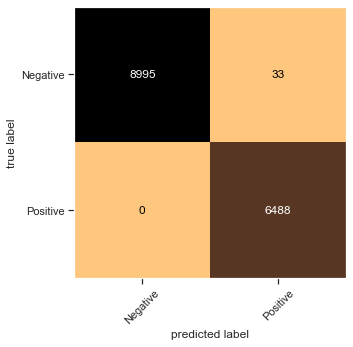

In [802]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_lr)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("LRcrr.png")

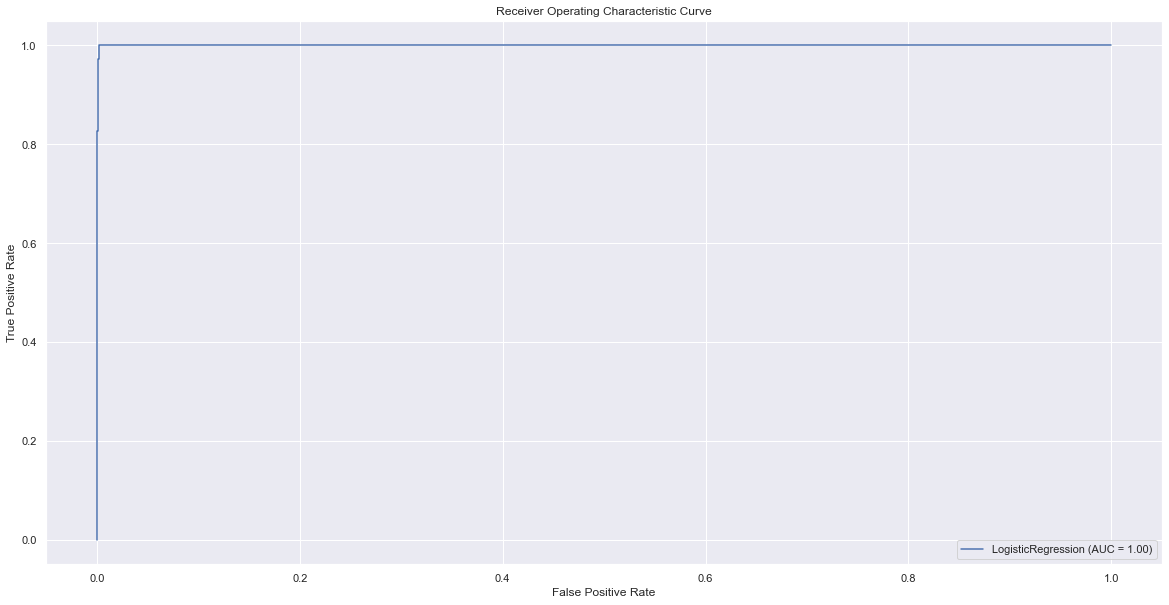

In [803]:
plot_roc_curve(LL,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("LR.png")

In [804]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       0.99      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



------------------------
**`-2-  KNN CLF`**
----------------------

In [805]:
kclf = KNeighborsClassifier(n_neighbors=31,leaf_size=30)
kclf.fit(X_train,Y_train)
Y_pred_kclf = kclf.predict(X_test)
score_kclf = round(accuracy_score(Y_pred_kclf,Y_test)*100,2)
score_kclf

85.59

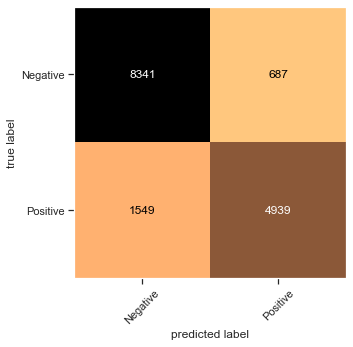

In [806]:
conf_mat=confusion_matrix(Y_test,Y_pred_kclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("KNNcrr.png")

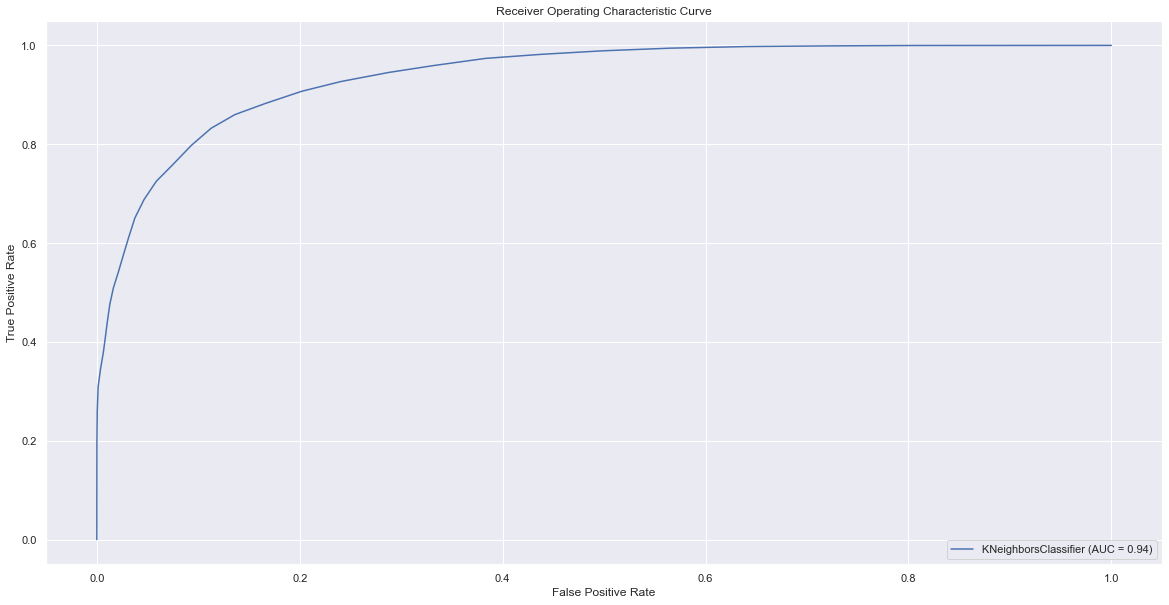

In [807]:
plot_roc_curve(kclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("KNN.png")

-----------------------
**`-3-  SVM`**
--------------------

In [808]:
svm = SVC(C=8.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    shrinking=True,
    probability=True,
    tol=0.1,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovo')
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_test)         
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

99.99

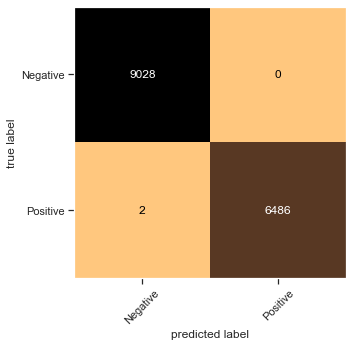

In [809]:
conf_mat=confusion_matrix(Y_test,Y_pred_svm)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("SVCcrr.png")

In [810]:
Y_pred_svm = np.around(Y_pred_svm)
print(metrics.classification_report(Y_test,Y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       1.00      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



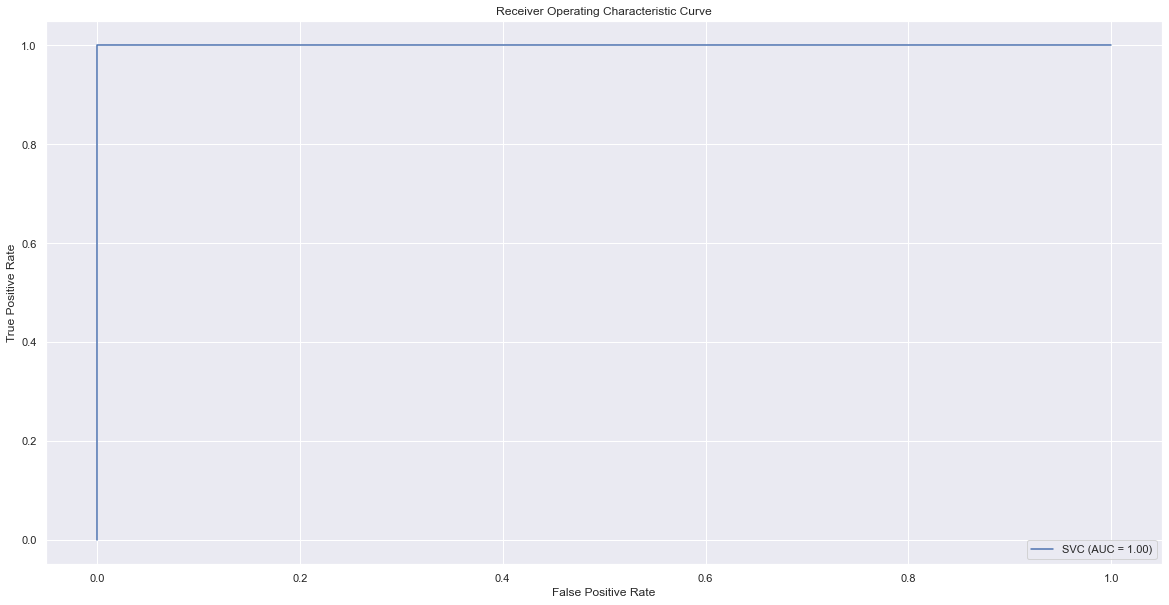

In [811]:
plot_roc_curve(svm,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("SVC.png")

-----------------------
**`-4-  Navie Bayes`**
--------------------

In [812]:
gnb = GaussianNB( var_smoothing=1e-50)
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_gnb = gnb.predict(X_test)          
score_gnb = round(accuracy_score(Y_pred_gnb,Y_test)*100,2)
score_gnb

80.28

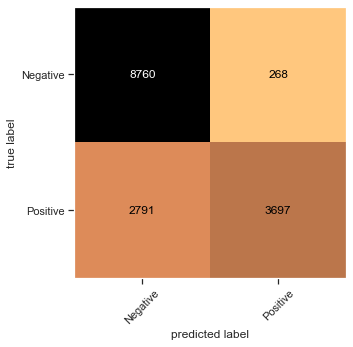

In [813]:
conf_mat=confusion_matrix(Y_test,Y_pred_gnb)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("GNBcrr.png")

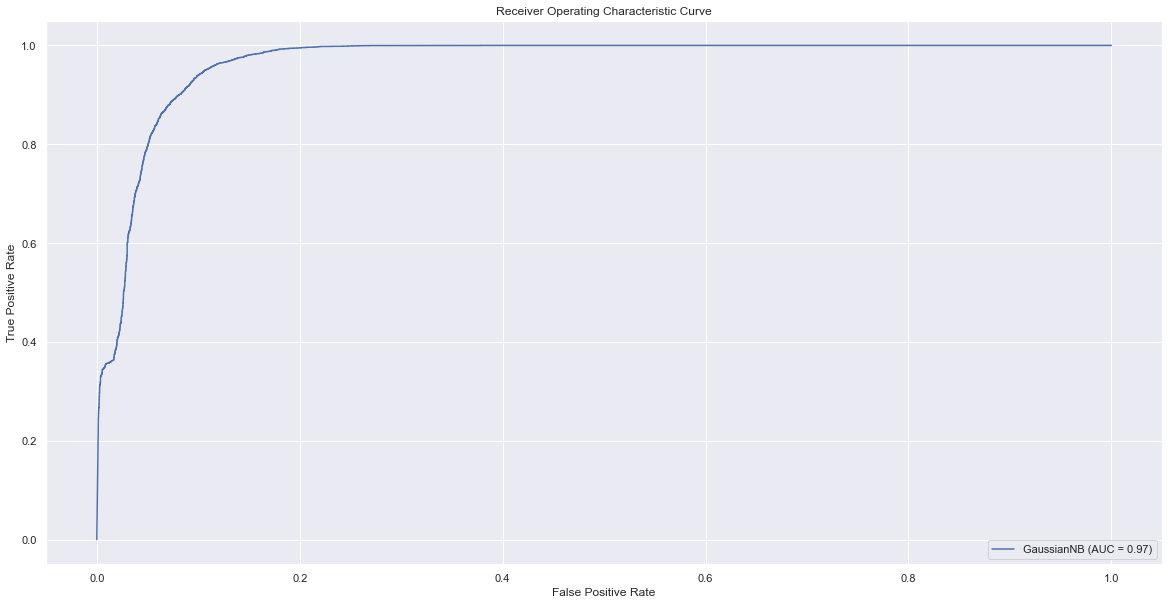

In [814]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

In [817]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_gnb))


              precision    recall  f1-score   support

           0       0.76      0.97      0.85      9028
           1       0.93      0.57      0.71      6488

    accuracy                           0.80     15516
   macro avg       0.85      0.77      0.78     15516
weighted avg       0.83      0.80      0.79     15516



-----------------------
**`-5- RandomForestClassifier with GridSearch`**
--------------------

In [818]:
param_grid ={
    'max_depth': [10, 20, 30, 40,50,60,70],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40,60,80 ]
}


In [819]:
RFclf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv = 4, n_jobs=2,verbose=2)
grid_result = grid.fit(X_train, Y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 56 candidates, totalling 224 fits
Best: 1.000000 using {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 20}


In [820]:
model=grid_result.best_estimator_
model

RandomForestClassifier(max_depth=10, n_estimators=20)

In [821]:
Y_pred_RFclf=model.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf,Y_test)*100,2)
score_RFclf

100.0

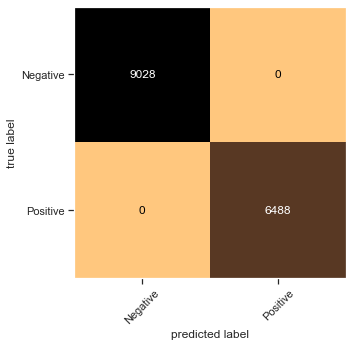

In [822]:
conf_mat=confusion_matrix(Y_test,Y_pred_RFclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("RF_GridSearch_crr.png")

In [823]:
Y_pred_RFclf = np.around(Y_pred_RFclf)
print(metrics.classification_report(Y_test,Y_pred_RFclf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       1.00      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



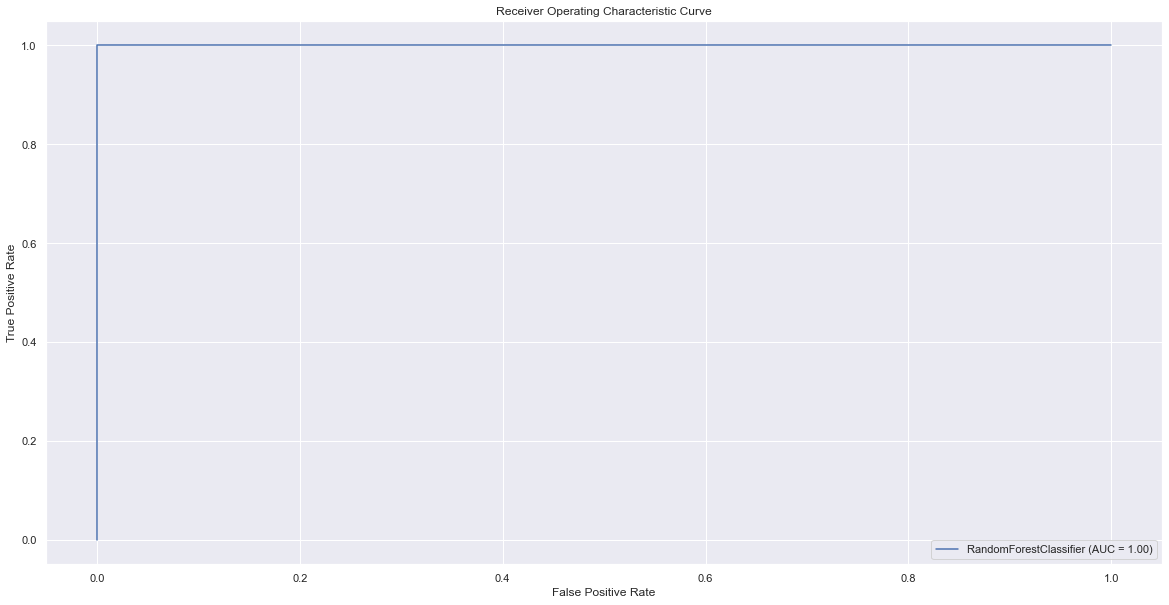

In [824]:
plot_roc_curve(model,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF_GridSearch.png")

-----------------------
**`-6- RandomForestClassifier`**
--------------------

In [825]:
max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)



100.0
0


In [826]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(15516,)

In [827]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

100.0

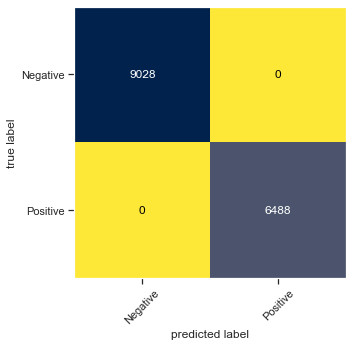

In [828]:
conf_mat=confusion_matrix(Y_test,Y_pred_rf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='cividis_r');
plt.savefig("RFcrr.png")

In [829]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       1.00      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



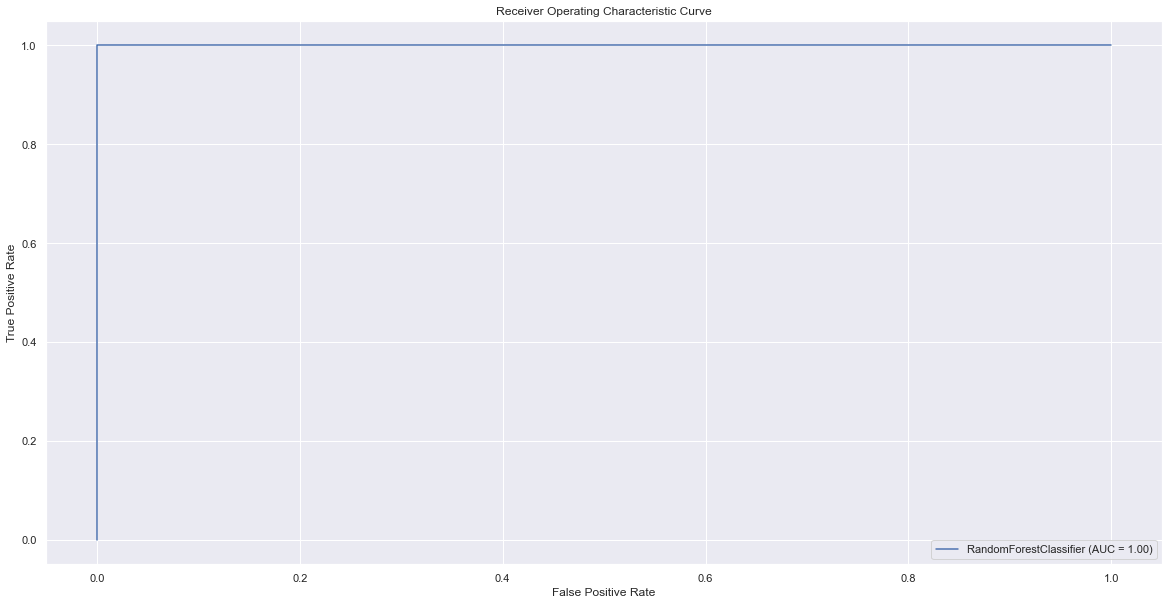

In [830]:
plot_roc_curve(rf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

-----------------------
**`-7- XGBoost `**
--------------------

In [831]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

[10:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100.0

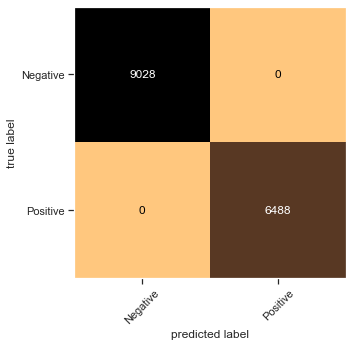

In [842]:
conf_mat=confusion_matrix(Y_test,Y_pred_xgb)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("xgbcrr.png")

In [833]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       1.00      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



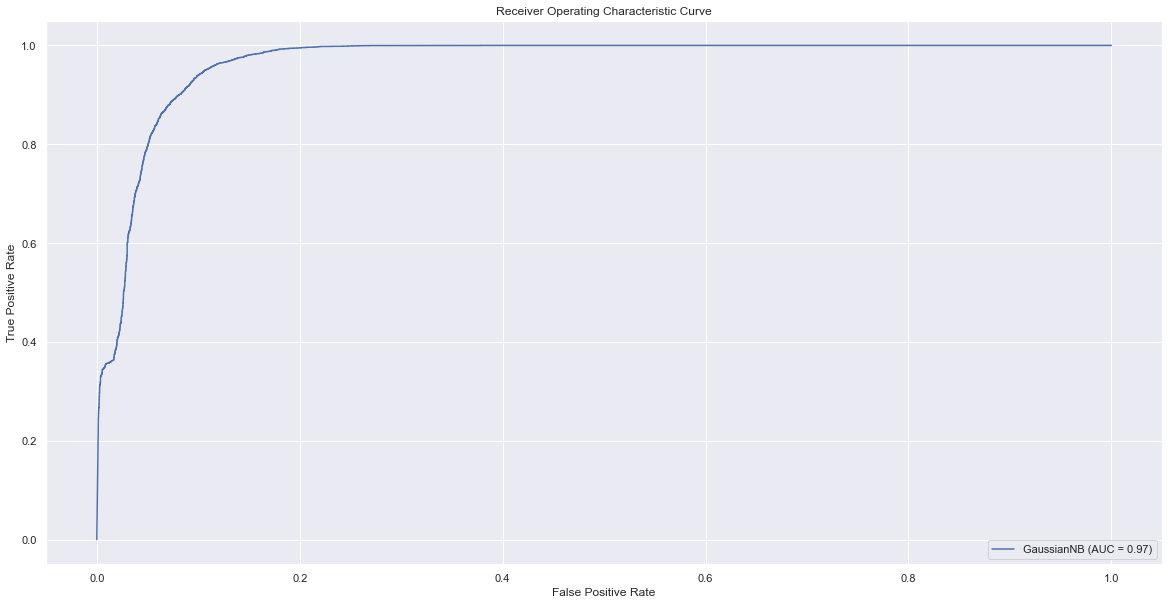

In [834]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

-----------------------
**`-8- Decision Tree Classifier `**
--------------------

In [843]:
tclf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
tclf.fit(X_train, Y_train)
Y_pred_tclf=tclf.predict(X_test)
score_tclf = round(accuracy_score(Y_pred_tclf,Y_test)*100,2)
score_tclf

100.0

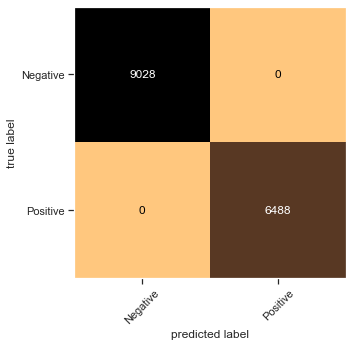

In [844]:
conf_mat=confusion_matrix(Y_test,Y_pred_tclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("DT.png")

In [837]:
Y_pred_tclf = np.around(Y_pred_tclf)
print(metrics.classification_report(Y_test,Y_pred_tclf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9028
           1       1.00      1.00      1.00      6488

    accuracy                           1.00     15516
   macro avg       1.00      1.00      1.00     15516
weighted avg       1.00      1.00      1.00     15516



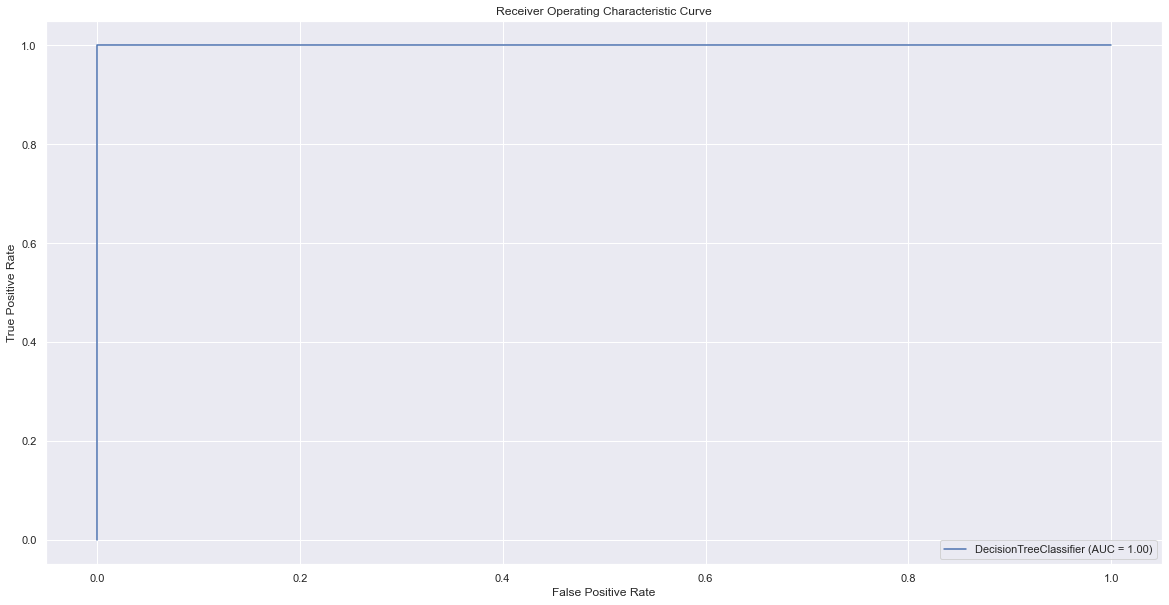

In [838]:
plot_roc_curve(tclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

-----------------------
**`-8- Showing Final Scores`**
--------------------

In [839]:
scores = [score_lr,score_kclf,score_svm,score_gnb,score_RFclf,score_rf,score_xgb,score_tclf]
Models = ["Logistic Regression","KNN CLF","Support Vector Machine","Gaussian Navie Bayes","Random Forest with GridSearch","Random Forest","XGBoost","Decision Tree"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 99.79 %
The accuracy score achieved using KNN CLF is: 85.59 %
The accuracy score achieved using Support Vector Machine is: 99.99 %
The accuracy score achieved using Gaussian Navie Bayes is: 80.28 %
The accuracy score achieved using Random Forest with GridSearch is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Decision Tree is: 100.0 %


Text(0.5, 1.0, 'Machine learning models accuracy')

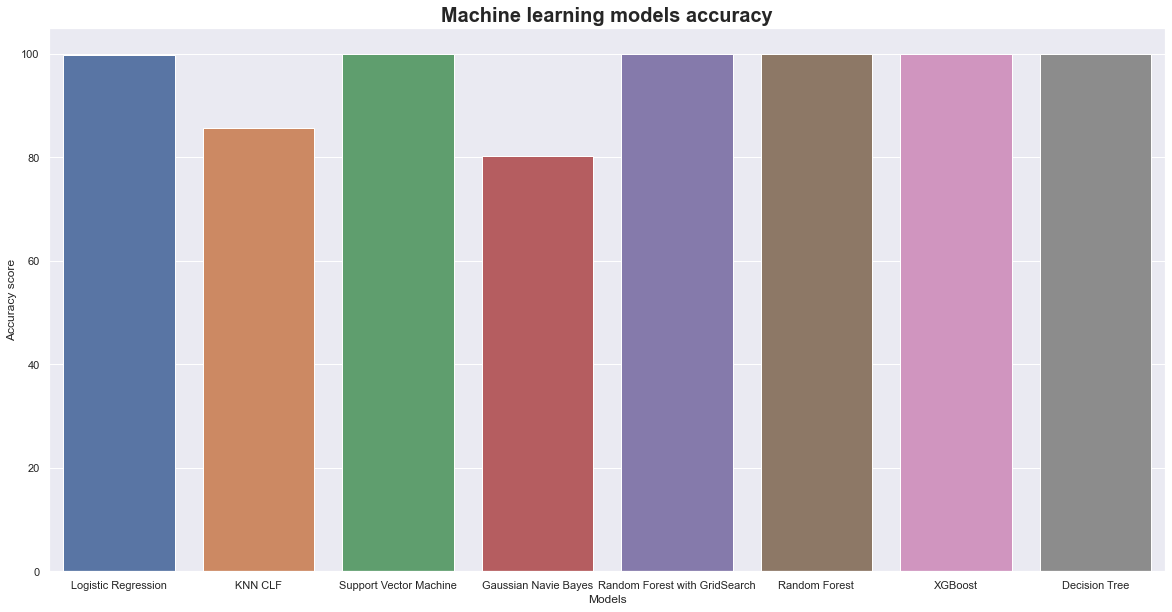

In [840]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")
plt.title('Machine learning models accuracy',fontdict={'fontsize': 20},fontweight ='bold')

## **`After analyzing and Processing the data I came up with various business question and answered it using EDA. At this project I tried my best to do what I can, I needed more time as I just received the email on Thursday evening and two days aren’t enough to come out with a good work. There are much more to do with this data especially in the modelling part and the validation test. I hope we can have a chance to discuss more about it, and any upcoming projects.`**


-----------------------
# **` Ola El- Shiekh`**
--------------------